<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(19, 186, 216); padding: 20px; background-color: rgba(0, 0, 0, 0.5); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color:rgb(19, 186, 216); text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5); font-weight: bold; margin-bottom: 10px;">📊GeoStat: Country-Level Data | 2023</h1>
</div>


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">1</span> | Introduction</p>

<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
This comprehensive dataset provides a wealth of information about all countries worldwide, covering a wide range of indicators and attributes. It encompasses demographic statistics, economic indicators, environmental factors, healthcare metrics, education statistics, and much more. With every country represented, this dataset offers a complete global perspective on various aspects of nations, enabling in-depth analyses and cross-country comparisons.

----------

Key Features

- Country: Name of the country.
- Density (P/Km2): Population density measured in persons per square kilometer.
- Abbreviation: Abbreviation or code representing the country.
- Agricultural Land (%): Percentage of land area used for agricultural purposes.
- Land Area (Km2): Total land area of the country in square kilometers.
- Armed Forces Size: Size of the armed forces in the country.
- Birth Rate: Number of births per 1,000 population per year.
- Calling Code: International calling code for the country.
- Capital/Major City: Name of the capital or major city.
- CO2 Emissions: Carbon dioxide emissions in tons.
- CPI: Consumer Price Index, a measure of inflation and purchasing power.
- CPI Change (%): Percentage change in the Consumer Price Index compared to the previous year.
- Currency_Code: Currency code used in the country.
- Fertility Rate: Average number of children born to a woman during her lifetime.
- Forested Area (%): Percentage of land area covered by forests.
- Gasoline_Price: Price of gasoline per liter in local currency.
- GDP: Gross Domestic Product, the total value of goods and services produced in the country.
- Gross Primary Education Enrollment (%): Gross enrollment ratio for primary education.
- Gross Tertiary Education Enrollment (%): Gross enrollment ratio for tertiary education.
- Infant Mortality: Number of deaths per 1,000 live births before reaching one year of age.
- Largest City: Name of the country's largest city.
- Life Expectancy: Average number of years a newborn is expected to live.
- Maternal Mortality Ratio: Number of maternal deaths per 100,000 live births.
- Minimum Wage: Minimum wage level in local currency.
- Official Language: Official language(s) spoken in the country.
- Out of Pocket Health Expenditure (%): Percentage of total health expenditure paid out-of-pocket by individuals.
- Physicians per Thousand: Number of physicians per thousand people.
- Population: Total population of the country.
- Population: Labor Force Participation (%): Percentage of the population that is part of the labor force.
- Tax Revenue (%): Tax revenue as a percentage of GDP.
- Total Tax Rate: Overall tax burden as a percentage of commercial profits.
- Unemployment Rate: Percentage of the labor force that is unemployed.
- Urban Population: Percentage of the population living in urban areas.
- Latitude: Latitude coordinate of the country's location.
- Longitude: Longitude coordinate of the country's location.

Potential Use Cases

- Analyze population density and land area to study spatial distribution patterns.
- Investigate the relationship between agricultural land and food security.
- Examine carbon dioxide emissions and their impact on climate change.
- Explore correlations between economic indicators such as GDP and various socio-economic factors.
- Investigate educational enrollment rates and their implications for human capital development.
- Analyze healthcare metrics such as infant mortality and life expectancy to assess overall well-being.
- Study labor market dynamics through indicators such as labor force participation and unemployment rates.
- Investigate the role of taxation and its impact on economic development.
- Explore urbanization trends and their social and environmental consequences.
- Data Source: This dataset was compiled from multiple data sources

<div>
    <font size="+2" color="#13bad8" ><b>🟦Import Dependencies 📦</b></font>
</div>

In [2]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

<div>
    <font size="+2" color="#13bad8" ><b>🟦Load Dataset🗂️</b></font>
</div>

In [3]:
#Load Dataset
df = pd.read_csv('world-data-2023.csv')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">2 | Data Cleaning and Preparation

</span> 

<div>
    <font size="+2" color="#13bad8" ><b>🟦Data Type Conversion 🔄</b></font>
</div>

In [4]:
# Data Type Conversion:
# Columns to convert to float
columns_to_convert = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
                      'Birth Rate', 'Co2-Emissions', 'Forested Area (%)',
                      'CPI', 'CPI Change (%)', 'Fertility Rate', 'Gasoline Price', 'GDP',
                      'Gross primary education enrollment (%)', 'Armed Forces size',
                      'Gross tertiary education enrollment (%)', 'Infant mortality',
                      'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 
                      'Out of pocket health expenditure', 'Physicians per thousand', 
                      'Population', 'Population: Labor force participation (%)', 
                      'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population']

# Convert columns using a lambda function
df[columns_to_convert] = df[columns_to_convert].applymap(lambda x: float(str(x).replace(',', '').replace('$', '').replace('%', '')))




<div>
    <font size="+2" color="#13bad8" ><b>🟦Handling missing values 🧮</b></font>
</div>

In [5]:
# List of columns with missing values
columns_with_missing = df.columns[df.isnull().any()]

# Impute numerical columns with mean
numerical_columns = df.select_dtypes(include=['float64'])
numerical_columns = numerical_columns.columns[numerical_columns.isnull().any()]
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Impute categorical columns with mode
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns = categorical_columns.columns[categorical_columns.isnull().any()]
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Verify if all missing values are handled
missing_counts = df.isnull().sum()
print(missing_counts)

Country                                      0
Density\n(P/Km2)                             0
Abbreviation                                 0
Agricultural Land( %)                        0
Land Area(Km2)                               0
Armed Forces size                            0
Birth Rate                                   0
Calling Code                                 0
Capital/Major City                           0
Co2-Emissions                                0
CPI                                          0
CPI Change (%)                               0
Currency-Code                                0
Fertility Rate                               0
Forested Area (%)                            0
Gasoline Price                               0
GDP                                          0
Gross primary education enrollment (%)       0
Gross tertiary education enrollment (%)      0
Infant mortality                             0
Largest city                                 0
Life expectan

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);"></span>DATA VISUALIZATION 📊</p>
    


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">3 </span>| Top 20 Countries: Highest Unemployment</p>

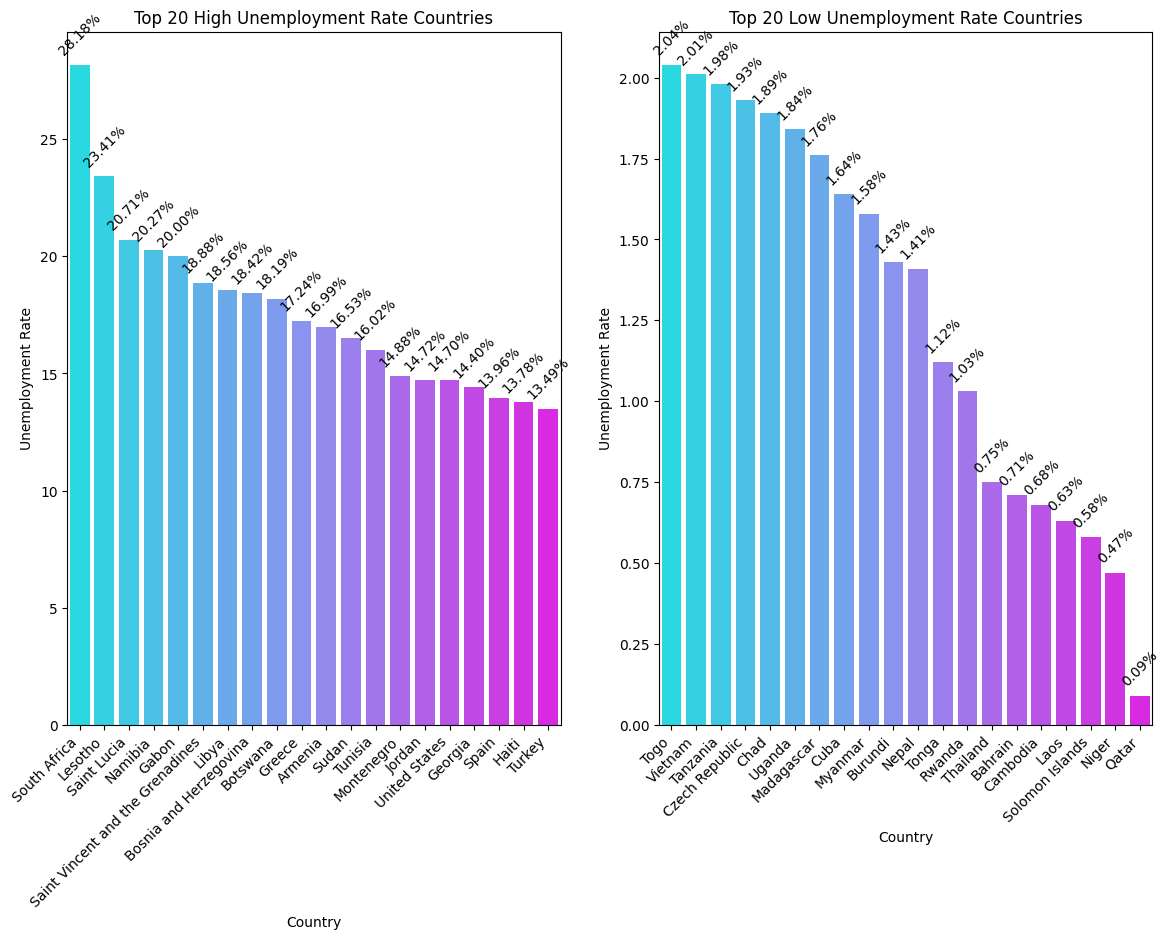

In [18]:
sorted_df = df.sort_values(by = 'Unemployment rate', ascending = False)

top_high_unemployment = sorted_df.head(20)
top_low_unemployment = sorted_df.tail(20)

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# Plot for high unemployment countries
sns.barplot(data=top_high_unemployment, x='Country', y='Unemployment rate', palette='cool', ax=axes[0])
axes[0].set_title('Top 20 High Unemployment Rate Countries')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Unemployment Rate')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points', rotation = 45)

# Plot for low unemployment countries
sns.barplot(data=top_low_unemployment, x='Country', y='Unemployment rate', palette='cool', ax=axes[1])
axes[1].set_title('Top 20 Low Unemployment Rate Countries')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Unemployment Rate')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points', rotation = 45)

# Show the plots
plt.show()



<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
<font size="+3" color='#059c99'><b> ✨Insights </b></font>

**Top 20 Countries with Highest Unemployment Rates:**
The left plot displays the countries with the highest unemployment rates. South Africa has the highest unemployment rate at 28.18%, followed by Lesotho and Saint Lucia. The United States also appears on this list with a relatively high unemployment rate.

**Top 20 Countries with Lowest Unemployment Rates:**
The right plot illustrates the countries with the lowest unemployment rates. These countries have remarkably low unemployment rates, with some even less than 1%. Qatar, Niger and Solomon islands, and Loas are among the countries with the lowest unemployment rates.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">4 </span>| Top 20 Countries: Highest Population</p>

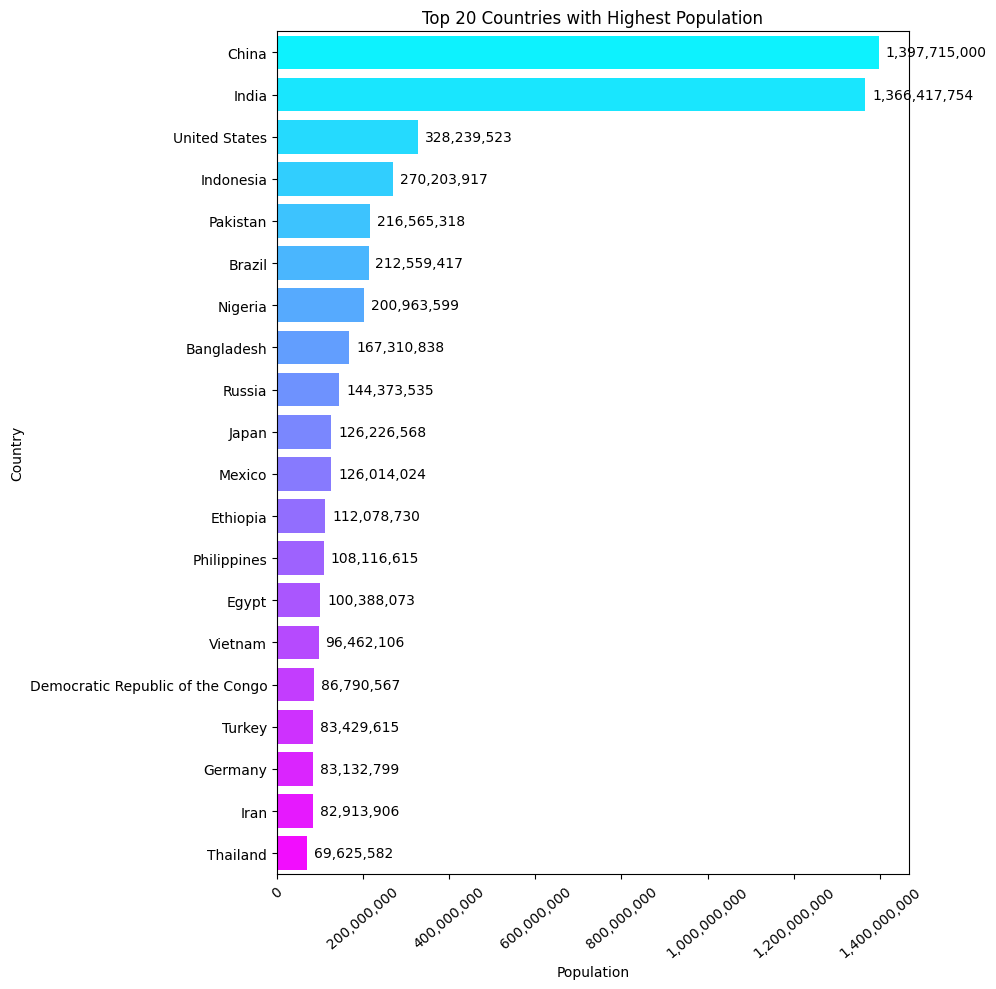

In [17]:
import matplotlib.ticker as ticker

sorted_df = df.sort_values(by='Population', ascending=False)

# Get the top 20 countries with the highest population
top_population_country = sorted_df.head(20)

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

# Plot for top population countries
sns.barplot(data=top_population_country, x='Population', y='Country', palette='cool', saturation=0.99, ax=axes)
axes.set_title('Top 20 Countries with Highest Population')
axes.set_xlabel('Population')
axes.set_ylabel('Country')
axes.set_xticklabels(['{:,}'.format(int(x)) for x in axes.get_xticks()], rotation = 40)
for p in axes.patches:
    axes.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                     xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
<font size="+3" color='#059c99'><b> ✨Insights</b></font>

**Top 20 Countries with Highest Population:**
The  plot displays the top 20 countries with the highest populations. China and India have the two highest populations, with around 1.4 billion people each. The United States follows with over 320 million people.


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">5 </span>| Top 20 Countries: Highest Birth Rates</p>

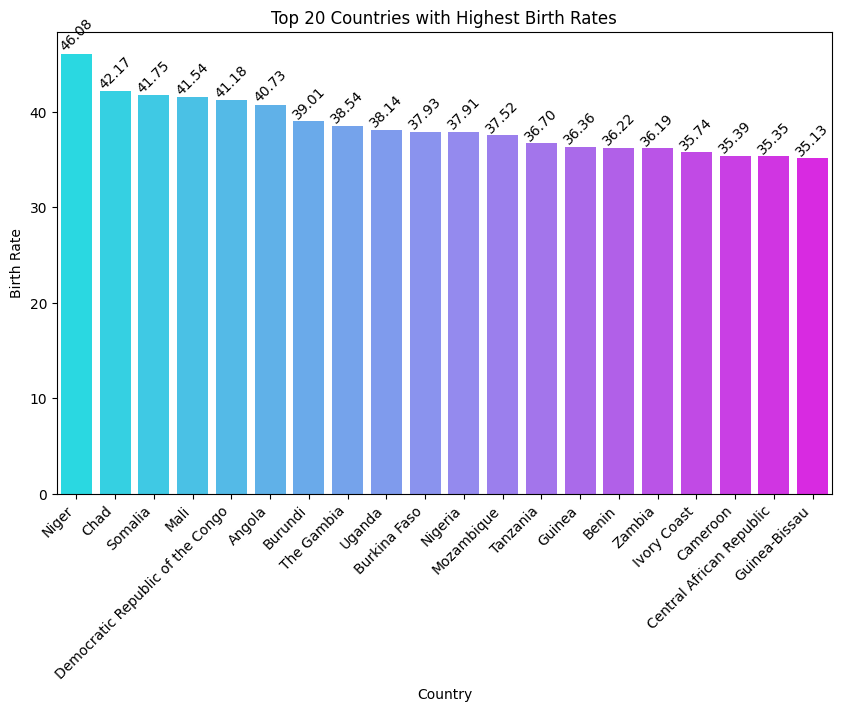

In [16]:
# Sort the dataframe by 'Birth Rate' column in descending order
sorted_df = df.sort_values(by='Birth Rate', ascending=False)

# Get the top 20 countries with the highest birth rates
top_country_birth = sorted_df.head(20)

# Create a bar plot to visualize the top 20 countries with high birth rates
plt.figure(figsize=(10, 6))
sns.barplot(data=top_country_birth, x='Country', y='Birth Rate', palette='cool')

# Add title and labels
plt.title('Top 20 Countries with Highest Birth Rates')
plt.xlabel('Country')
plt.ylabel('Birth Rate')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display data labels on top of each bar
for index, value in enumerate(top_country_birth['Birth Rate']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10, rotation = 45)

# Show the plot
plt.show()



<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
<font size="+3" color='#059c99'><b> ✨Insights  </b></font>

**Countries with Highest Birth Rates:**
This visualization highlights the top 20 countries with the highest birth rates. Niger has the highest birth rate at 46.08 births per 1000 people, followed by Mali and the Democratic Republic of the Congo.
It gives us insight into the population growth dynamics in these nations.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">6</span>| Top 20 Countries: Highest Agricultural</p>

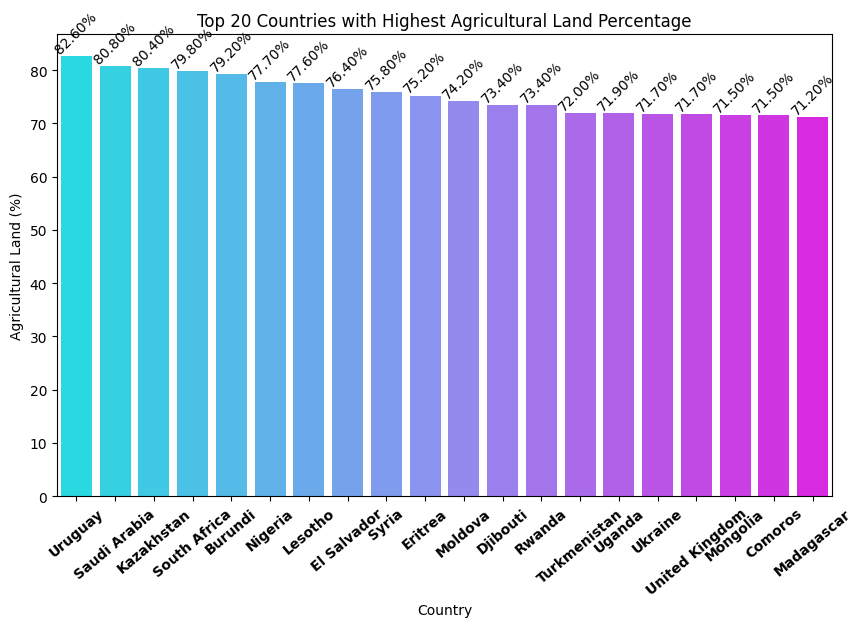

In [15]:
# Sort the dataframe by 'Agricultural Land (%)' column in descending order
sorted_df = df.sort_values(by='Agricultural Land( %)', ascending=False)

# Get the top 20 countries with the highest agricultural land percentages
top_country_Agri = sorted_df.head(20)

# Create a bar plot to visualize the top 20 countries with high agricultural land percentages
plt.figure(figsize=(10, 6))
sns.barplot(data=top_country_Agri, x='Country', y='Agricultural Land( %)', palette='cool')

# Add title and labels
plt.title('Top 20 Countries with Highest Agricultural Land Percentage')
plt.xlabel('Country')
plt.ylabel('Agricultural Land (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=40,fontweight = 'bold',fontsize = 10 )

# Annotate the bars with actual values
for index, value in enumerate(top_country_Agri['Agricultural Land( %)']):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=10 , rotation = 45)


# Show the plot
plt.show()


<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
<font size="+3" color='#059c99'><b> ✨Insights </b></font>

- **Countries with Most Farming Land:**
This graph shows the top 20 countries that use the most land for farming. Uruguay is at the top with 82.6% of its land used for agriculture. Saudi Arabia and Kazakhstan are also high on the list.

- **Agricultural Land Across Countries:**
The chart helps us compare how much land each country uses for farming. Uruguay leads, followed by Saudi Arabia and Kazakhstan. This tells us how much land is dedicated to farming in each of these countries.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">7 </span>| Top 20 Countries: Largest Armed Forces</p>

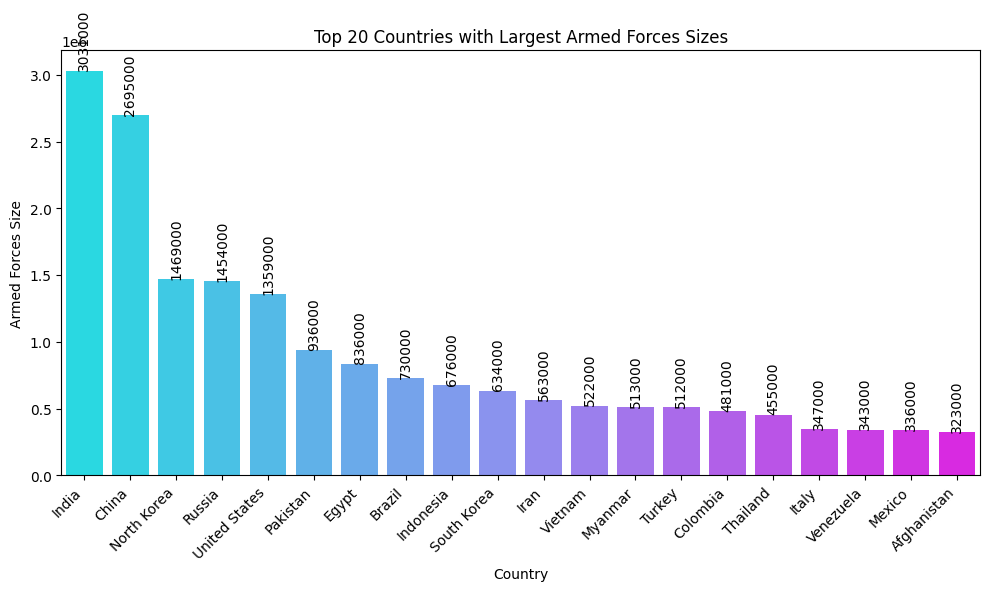

In [22]:
# Sort the DataFrame by 'Armed Forces size' column in descending order
sorted_df = df.sort_values(by='Armed Forces size', ascending=False)

plt.figure(figsize=(10, 6))

# Get the top 20 countries with the largest armed forces sizes
top10 = sorted_df.head(20)

# Create a bar plot to visualize the top 20 countries with the largest armed forces sizes
sns.barplot(data=top10, x='Country', y='Armed Forces size', palette='cool')

# Add title and labels
plt.title('Top 20 Countries with Largest Armed Forces Sizes')
plt.xlabel('Country')
plt.ylabel('Armed Forces Size')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Annotate the bars with actual values
for index, value in enumerate(top10['Armed Forces size']):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom', fontsize=10, rotation=90)  # Rotate text

# Show the plot
plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
<font size="+3" color='#059c99'><b> ✨Insights </b></font>

**Top 20 Countries with Largest Armed Forces Sizes:**

The  graph shows the sizes of the armies in the top 20 countries. India has the biggest army, followed by China, Russia, United States and pakistan. This graph helps us see how different these countries' armies are.



# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">8 </span>| Top 20 Countries: Largest Land Areas</p>

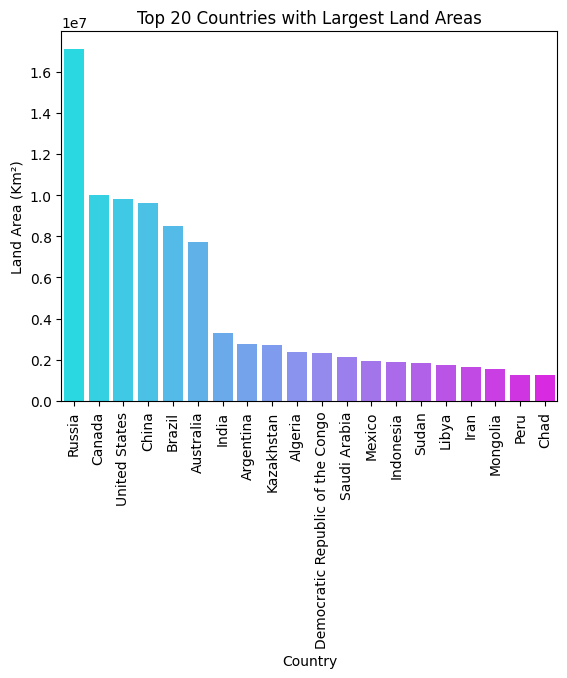

In [23]:
# Step 02: Sort the dataframe by 'Land Area(Km2)' column in descending order
sorted_df = df.sort_values(by='Land Area(Km2)', ascending=False)

# Step 03: Get the top 20 countries with the largest land areas
top_land_area_countries = sorted_df.head(20)
top_land_vs_population_countries = sorted_df.head(20)
# Create subplots for both bar plot and scatter plot

# Bar plot of top countries with largest land areas
sns.barplot(data=top_land_area_countries, x='Country', y='Land Area(Km2)', palette='cool')
plt.title('Top 20 Countries with Largest Land Areas')
plt.xlabel('Country')
plt.ylabel('Land Area (Km²)')
plt.xticks(rotation = 90)

# Show the plots

plt.show()


<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
<font size="+3" color='#059c99'><b> ✨Insights </b></font>

The visualization showcases the land area distribution of the top 20 countries, highlighting Russia as the leader with the largest land area, followed by Canada, the United States, and China. This graphical representation effectively illustrates the significant geographical extent of these nations compared to others.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">9 </span>| Top 20 Countries: Highest CO2 Emissions</p>

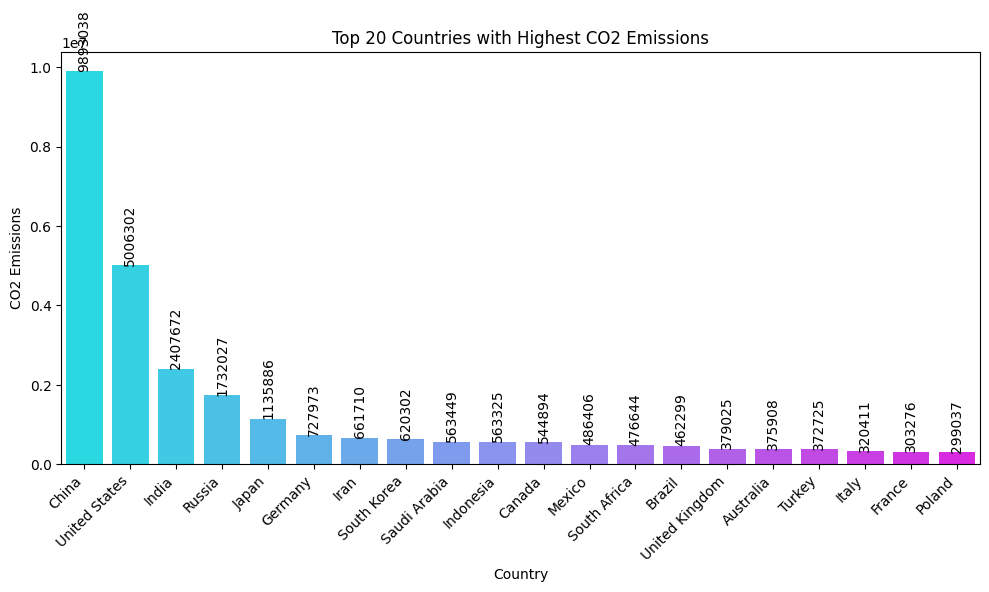

In [25]:
# Sort the DataFrame by CO2 emissions column in descending order and get the top 20 rows
top_co2_emissions_countries = df.sort_values(by='Co2-Emissions', ascending=False).head(20)

plt.figure(figsize=(10, 6))

# Create a bar plot to visualize CO2 emissions for top countries
sns.barplot(data=top_co2_emissions_countries, x='Country', y='Co2-Emissions', palette='cool')
plt.title('Top 20 Countries with Highest CO2 Emissions')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions')
plt.xticks(rotation=45, ha='right')

for index , value in enumerate(top_co2_emissions_countries['Co2-Emissions']):
    # plt.text(index, value, f'{value:.0f}', ha = 'center',va = 'bottom', fontsize = 10, rotation = 45)
    plt.text(index, value,f'{value:.0f}',ha = 'center',va = 'bottom', fontsize = 10, rotation = 90)
plt.tight_layout()
plt.show()



<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
<font size="+3" color='#059c99'><b> ✨Insights </b></font>

The bar plot showcases the top 20 countries with the highest CO2 emissions. China has the highest CO2 emissions, followed by the United States and India. This visualization highlights the significant carbon dioxide emissions from these countries, indicating their impact on global environmental concerns such as climate change.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">10 </span>| Top 20 Countries: Low Infant Mortality</p>

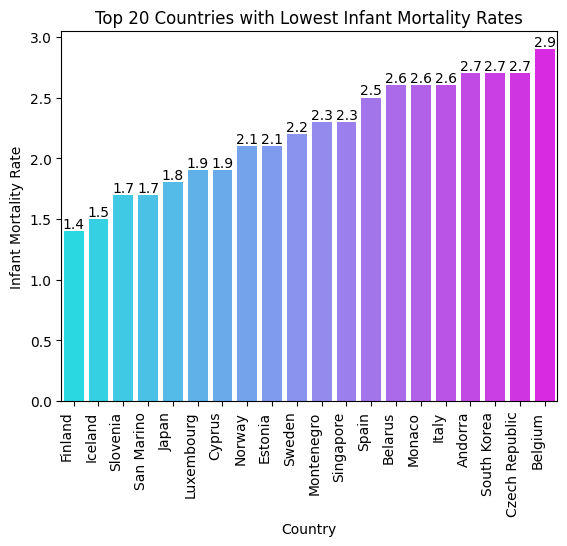

In [26]:
# Sort the DataFrame by infant mortality column in ascending order and get the top 20 rows
top_infant_mortality_countries = df.sort_values(by='Infant mortality', ascending=True).head(20)

# Create a bar plot to visualize infant mortality rates for top countries
sns.barplot(data=top_infant_mortality_countries, x='Country', y='Infant mortality', palette='cool')
plt.title('Top 20 Countries with Lowest Infant Mortality Rates')
plt.xlabel('Country')
plt.ylabel('Infant Mortality Rate')
plt.xticks(rotation=90, ha='right')

for index, value in enumerate(top_infant_mortality_countries['Infant mortality']):
    plt.text(index, value, f'{value}', ha='center', va='bottom', fontsize=10)  # Rotate text

<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
<font size="+3" color='#059c99'><b> ✨Insights </b></font>

Bar graph to show the 20 countries with the lowest rates (between 1.2 and 2.9 for every 1000 babies). This helps us see which countries are doing well in keeping babies healthy and where there's room for improvement.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">11 </span>| Top 10 Countries:High Infant Mortality</p>

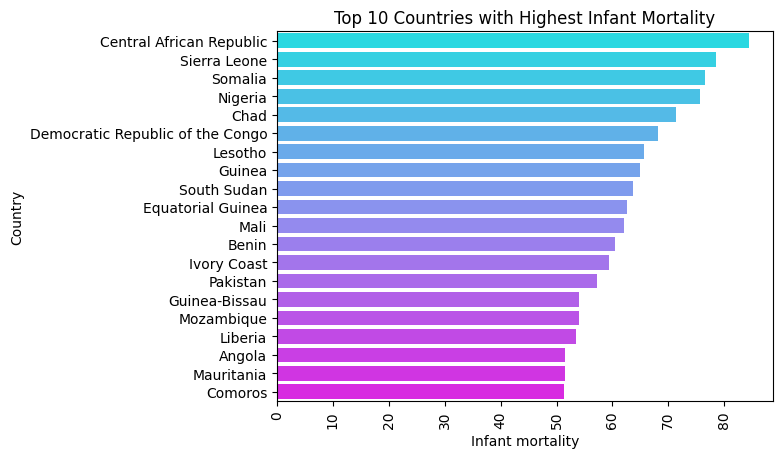

In [27]:
top_infant_mortality = df.sort_values(by='Infant mortality', ascending=False).head(20)
sns.barplot(x='Infant mortality', y='Country', data=top_infant_mortality, palette='cool')
plt.title('Top 10 Countries with Highest Infant Mortality')
plt.xticks(rotation=90)
plt.show()



<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
<font size="+3" color='#059c99'><b> ✨Insights </b></font>

High infant mortality rates (50.6 to 80.0 per 1000 live births) reveal healthcare disparities among the top 10 countries. Urgent action and international collaboration are needed to improve conditions and reduce these rates.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">12 </span>| Top 20 Countries: Highest GDP</p>

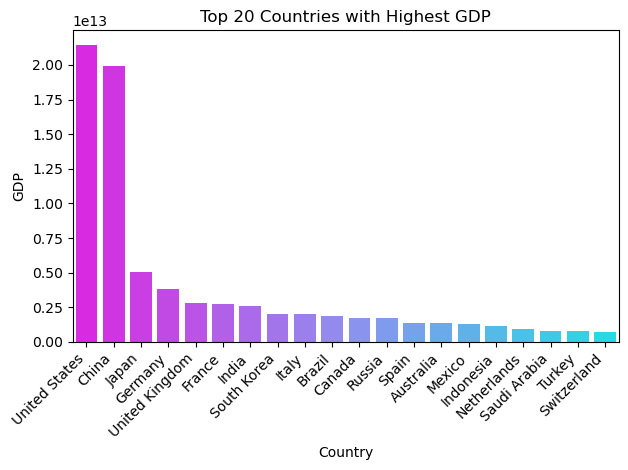

In [14]:
# Sort the DataFrame by GDP column in descending order and get the top 20 rows
top_gdp_countries = df.sort_values(by='GDP', ascending=False).head(20)

# Create a bar plot to visualize GDP for top countries
sns.barplot(data=top_gdp_countries, x='Country', y='GDP', palette='cool_r')
plt.title('Top 20 Countries with Highest GDP')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
<font size="+3" color='#059c99'><b> ✨Insights </b></font>

A bar graph illustrates their GDP values, ranging from billions to trillions, showcasing leading economies.
The bar plot visualizes the top 20 countries with the highest Gross Domestic Product (GDP). The United States leads with the highest GDP, followed by China, Germany, and the United Kingdom, showcasing their significant economic strength. The graph offers a clear comparison of GDP values among these countries.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">13 </span>| Top 20 Countries: Highest Tertiary Education Enrollment Rates</p>

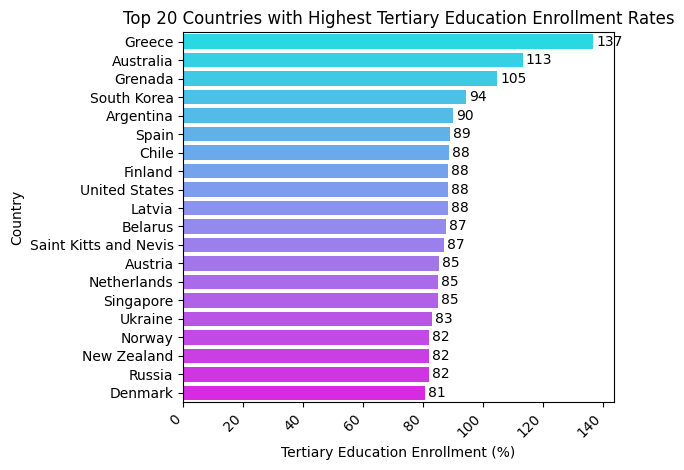

In [28]:
# Sort the DataFrame by gross tertiary education enrollment column in descending order and get the top 20 rows
top_tertiary_enrollment_countries = df.sort_values(by='Gross tertiary education enrollment (%)', ascending=False).head(20)

# Create a bar plot to visualize tertiary education enrollment for top countries
ax = sns.barplot(data=top_tertiary_enrollment_countries, x='Gross tertiary education enrollment (%)', y='Country', palette='cool')
plt.title('Top 20 Countries with Highest Tertiary Education Enrollment Rates')
plt.xlabel('Tertiary Education Enrollment (%)')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the exact tertiary enrollment value using plt.text
for index, value in enumerate(top_tertiary_enrollment_countries['Gross tertiary education enrollment (%)']):
    ax.text(value + 1, index, f'{value:.0f}', va='center', color='black')

plt.tight_layout()
plt.show()



<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
<font size="+3" color='#059c99'><b> ✨Insights</b></font>

The bar plot visualizes the top 20 countries with the highest gross tertiary education enrollment rates. Notably, Greece holds the highest rate at 136.6%, followed by Australia, South Korea, and Argentina. The graph highlights the significant disparities in tertiary education enrollment across these nations, showcasing their dedication to higher education.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">14 </span>| Countries by Top Languages</p>

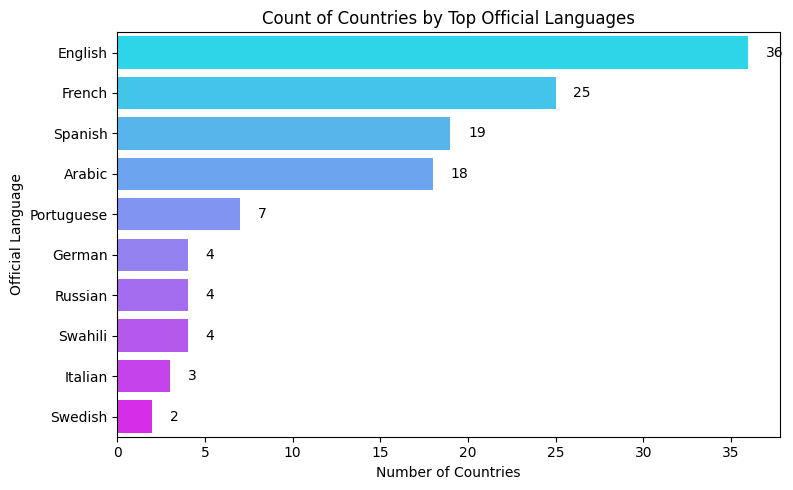

In [29]:
# Specify the number of top languages to display
top_languages_count = 10

# Get the top N official languages
top_languages = df['Official language'].value_counts().nlargest(top_languages_count).index

# Filter the DataFrame to include only the top languages
df_top_languages = df[df['Official language'].isin(top_languages)]

# Count of Countries by Top Official Languages
plt.figure(figsize=(8, 5))
sns.countplot(data=df_top_languages, y='Official language', order=df_top_languages['Official language'].value_counts().index, palette='cool', saturation=0.8)
plt.title('Count of Countries by Top Official Languages')
plt.xlabel('Number of Countries')
plt.ylabel('Official Language')
plt.tight_layout()

# Add annotations to the bars
for index, value in enumerate(df_top_languages['Official language'].value_counts()):
    plt.text(value + 1, index, f'{value}', va='center')

plt.show()


<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
<font size="+3" color='#059c99'><b> ✨Insights </b></font>

Graphs showing the count of countries by top official languages:

- French, English, and Spanish are the most common official languages among the top 10 countries.
- Arabic and Portuguese are also widely spoken as official languages, each being the primary language in around 10 countries.
- There are a few countries with None as their official language, which might indicate linguistic diversity or multilingualism.
- Russian, Swahili, Persian, and Romanian are also represented, albeit in smaller numbers.



# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">15 </span>| Top 20 CPI Change (%): Currency Code</p>

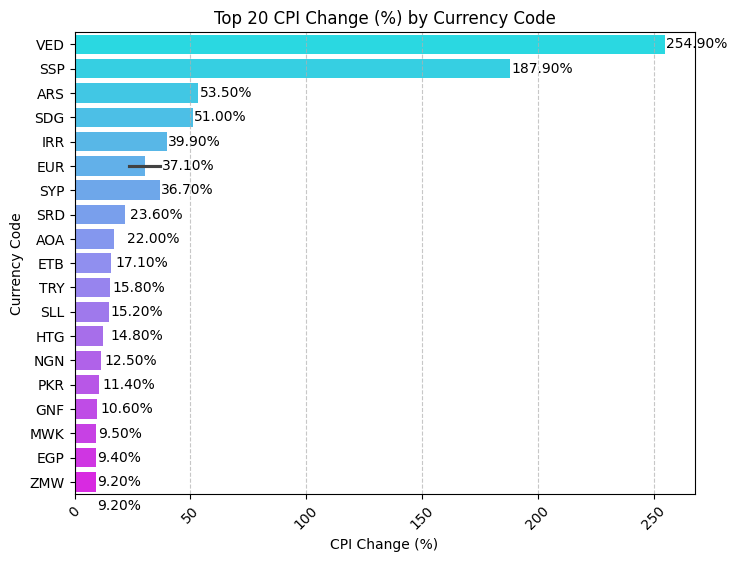

In [33]:
# Select top N currencies with the highest CPI changes
top_n_currencies = 20
top_currencies = df.nlargest(top_n_currencies, 'CPI Change (%)')

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='CPI Change (%)', y='Currency-Code', data=top_currencies, palette = "cool")
plt.title('Top {} CPI Change (%) by Currency Code'.format(top_n_currencies))
plt.xlabel('CPI Change (%)')
plt.ylabel('Currency Code')
plt.xticks(rotation=45)  # Rotate currency code labels for better readability

# Add data labels to the bars
for index, value in enumerate(top_currencies['CPI Change (%)']):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

# Add horizontal grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
<font size="+3" color='#059c99'><b> ✨Insights </b></font>

A bar graph displays these changes, ranging from 9.2% to 254.9%, revealing economic trends and variations among currencies.

The graph highlights varying CPI changes across currencies, indicating economic conditions and inflation trends. Currencies with high positive CPI changes might suggest inflationary pressures and economic growth, while negative changes could reflect deflationary concerns.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">16 </span>| Urbanization Trends by Country</p>

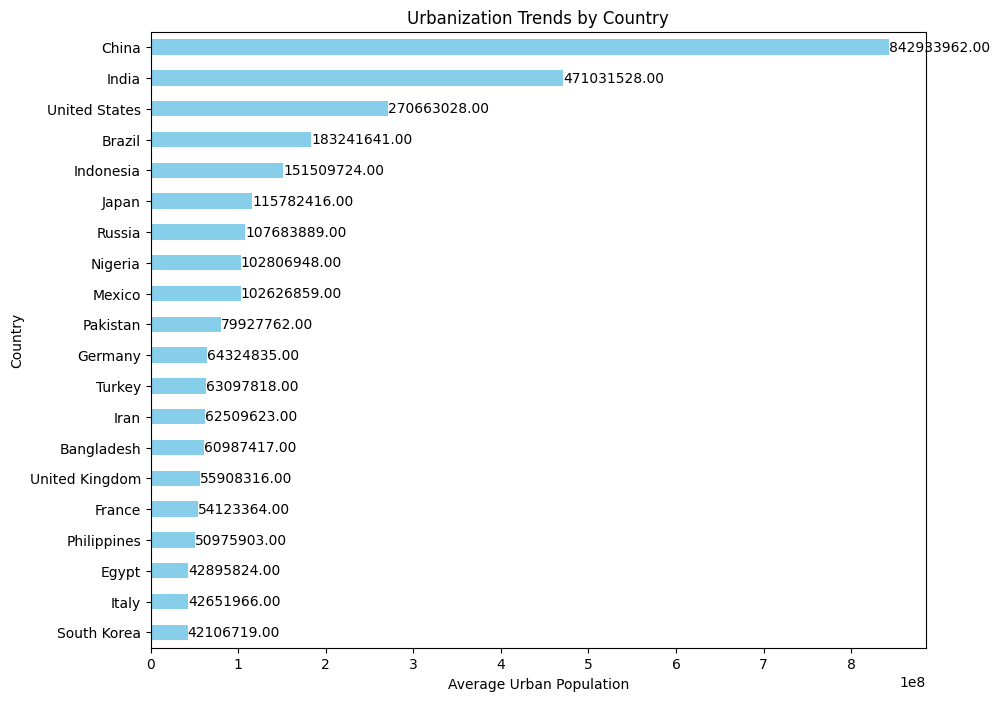

In [37]:
subset_countries = 20  # Number of top countries to display
urbanization_by_country = df.groupby('Country')['Urban_population'].mean().sort_values(ascending=False).head(subset_countries)

plt.figure(figsize=(10, 8))
ax = urbanization_by_country.plot(kind='barh', color='skyblue')
plt.title('Urbanization Trends by Country')
plt.xlabel('Average Urban Population')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top

# Add data labels to the bars
for index, value in enumerate(urbanization_by_country):
    ax.text(value + 2, index, f'{value:.2f}', va='center', color='black')  # Display values on a separate axis

plt.show()

<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
<font size="+3" color='#059c99'><b> ✨Insights</b></font>

Notable entries include China with around 842 million, India with about 471 million, and the United States with approximately 270 million urban inhabitants.

The bar chart highlights the top countries with the highest average urban populations. China, India, and the United States lead, each with urban populations exceeding hundreds of millions, while Brazil, Indonesia, and Russia follow closely in terms of urbanization.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">17 </span>| Population Density Distribution</p>

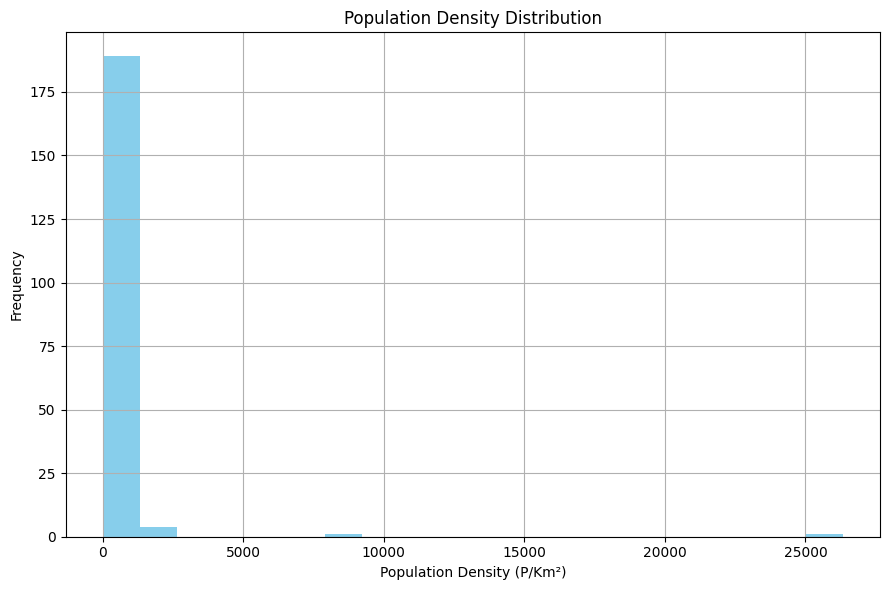

In [39]:
plt.figure(figsize=(9, 6))
plt.hist(df['Density\n(P/Km2)'], bins=20, color='skyblue')
plt.title('Population Density Distribution')
plt.xlabel('Population Density (P/Km²)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
<font size="+3" color='#059c99'><b> ✨Insights </b></font>

The histogram indicates that a higher number of countries have relatively lower population densities, while fewer countries have higher population densities exceeding 1000 people per square kilometer. This is evident from the taller bars in the lower range of population density values compared to the higher values, which leads to the right-skewed distribution.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">18 </span>| Distribution of Life Expectancy</p>

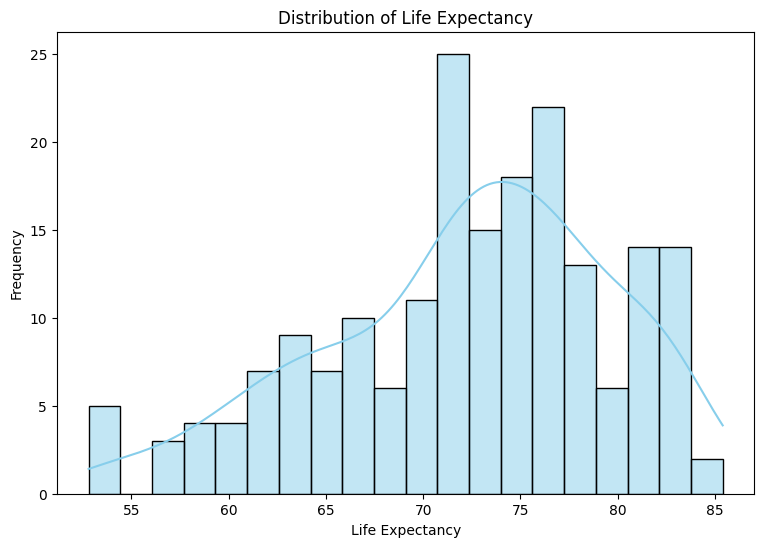

In [41]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='Life expectancy', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()


<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
<font size="+3" color='#059c99'><b> ✨Insights </b></font>

The distribution of life expectancy is skewed to the left, with a peak around 75-80 years. Most countries have life expectancies between 60 and 85 years.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">18 </span>| Distribution of Birth Rates</p>

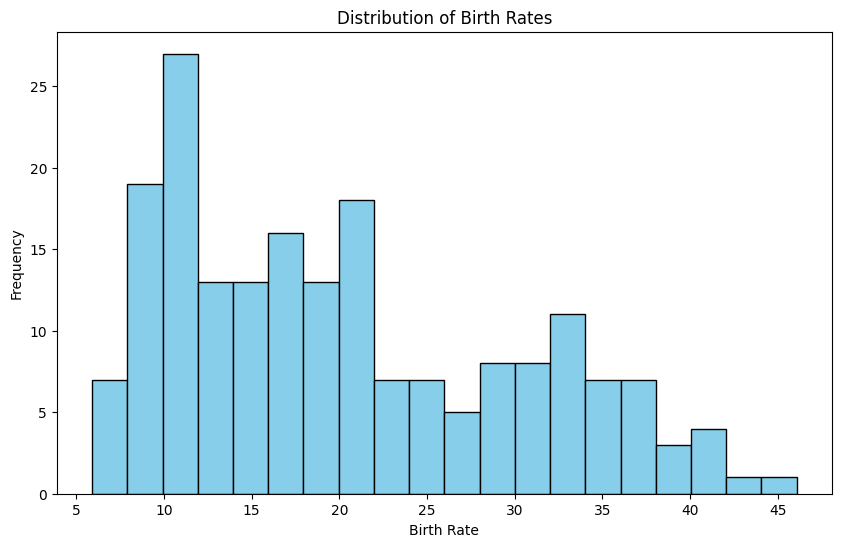

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(df['Birth Rate'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Birth Rates')
plt.xlabel('Birth Rate')
plt.ylabel('Frequency')
plt.show()


<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
<font size="+3" color='#059c99'><b> ✨Insights </b></font>

The histogram of birth rates indicates a skewed distribution, with fewer countries having higher birth rates and a larger proportion having lower birth rates.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">19 </span>| Urban Population Distribution:</p>

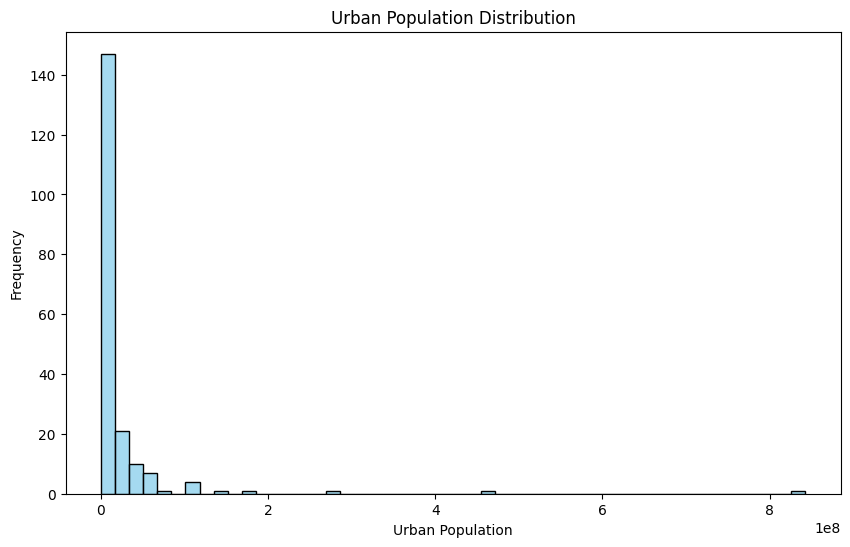

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Urban_population'], bins=50, color= "skyblue")
plt.title('Urban Population Distribution')
plt.xlabel('Urban Population')
plt.ylabel('Frequency')
plt.show()


<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
<font size="+3" color='#059c99'><b> ✨Insights </b></font>

The urban population distribution exhibits a right-skewed pattern, with a higher concentration of countries having smaller urban populations.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">20 </span>| Distribution of Currency Codes</p>

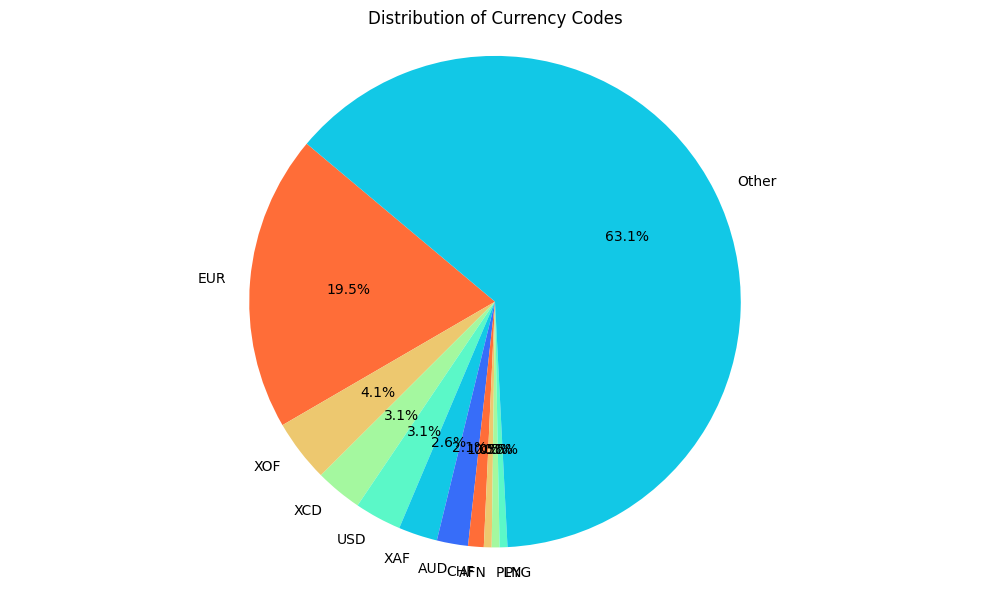

In [52]:
# Get the top N currency codes (e.g., top 10)
top_n_currency = 10
currency_counts = df['Currency-Code'].value_counts().head(top_n_currency)

# Calculate the sum of remaining counts
remaining_counts = df['Currency-Code'].value_counts().sum() - currency_counts.sum()

# Create a new Series for the top currency codes and an "Other" category using pd.concat
other_category = pd.Series([remaining_counts], index=['Other'])
currency_counts = pd.concat([currency_counts, other_category])

# Plot the pie chart
plt.figure(figsize=(10,6))
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(currency_counts, labels=currency_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("rainbow_r"))
plt.title('Distribution of Currency Codes')
plt.axis('equal')
plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
<font size="+3" color='#059c99'><b> ✨Insights </b></font>

The currency distribution includes EUR (19.5%), XOF (4.1%), XAF (3.1%), USD (3.1%) etc , and others (63.1%).

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">21 </span>| Economic Indicators Scatter Matrix:</p>

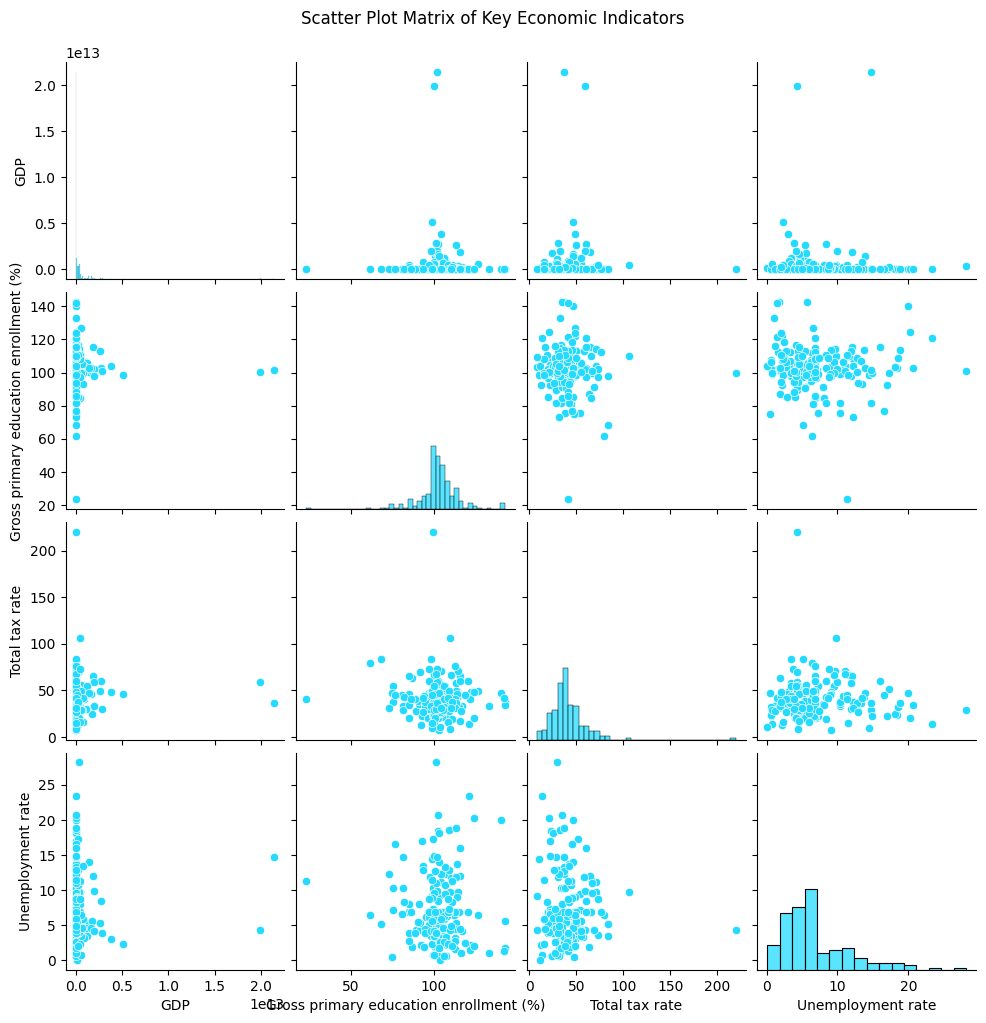

In [54]:
economic_indicators = df[['GDP', 'Gross primary education enrollment (%)', 'Total tax rate', 'Unemployment rate']]
sns.pairplot(economic_indicators, palette = "cool")
plt.suptitle('Scatter Plot Matrix of Key Economic Indicators', y=1.02)
plt.show()

<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
<font size="+3" color='#059c99'><b> ✨Insights </b></font>

The pair plot indicating potential correlations and trends in economic indicators.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">22 </span>| Birth Rate vs GDP</p>

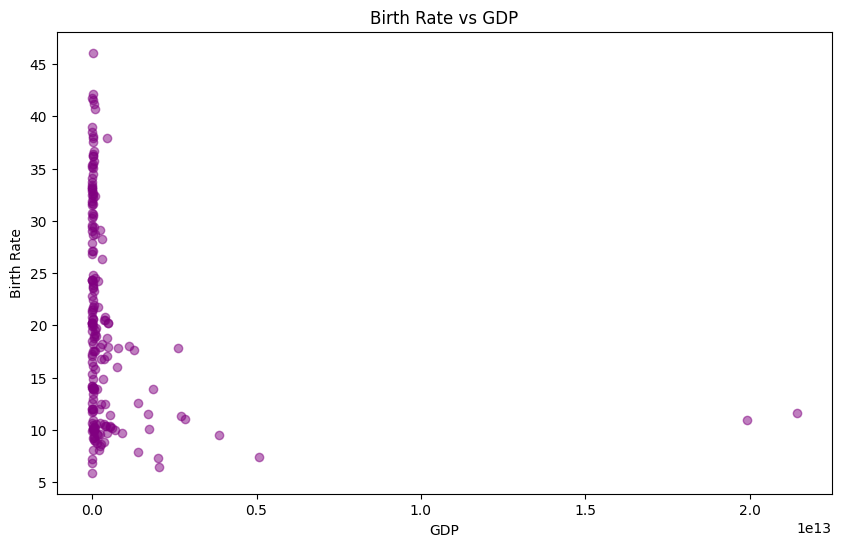

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(df['GDP'], df['Birth Rate'], color='purple', alpha=0.5)
plt.title('Birth Rate vs GDP')
plt.xlabel('GDP')
plt.ylabel('Birth Rate')
plt.show()


<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
<font size="+3" color='#059c99'><b> ✨Insights  </b></font>

This trend indicates that countries with lower GDPs tend to have higher birth rates, possibly influenced by socio-economic factors and development status.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">23 </span>| Global Distribution of Countries</p>

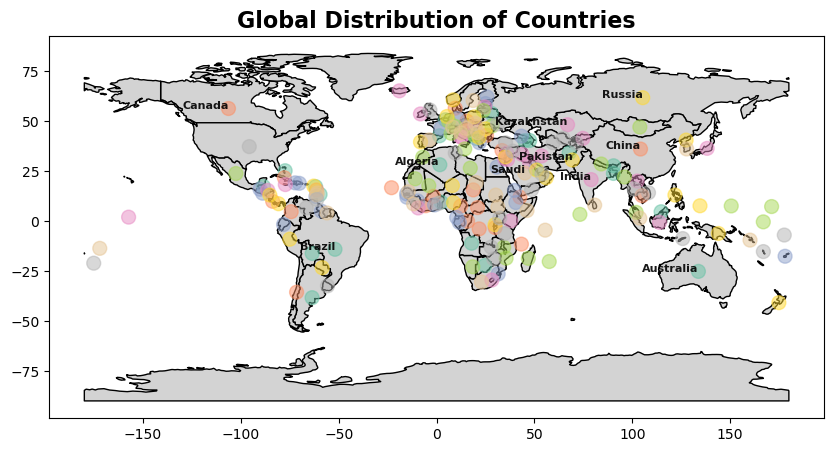

In [26]:
import geopandas as gpd
from shapely.geometry import Point

# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

# World map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 6))

# Plot world map
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot country points with a color map
scatter = gdf.plot(ax=ax, markersize=100, legend=True, cmap='Set2', alpha=0.5, categorical=True, legend_kwds={'bbox_to_anchor': (1, 1)})

# Annotate country names
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['Country']):
    if label in ['United States of America', 'Canada', 'Russia',
                 'China', 'Australia','Pakistan','India','Brazil', 'Kazakhstan','Algeria', 'Saudi Arabia']:
        ax.text(x, y, label.split(' ')[0], fontsize=8, ha='right', color='black', weight='bold', alpha=0.9)
    else:
        ax.text(x, y, '', fontsize=8, ha='right', color='darkslategrey', weight='bold', alpha=0.7)

# Set a title
plt.title('Global Distribution of Countries', fontsize=16, fontweight='bold')

# Display the plot
plt.show()

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">24 </span>| Conclusion</p>

<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
    
<font size="+3" color='#059c99'><b> ✨Conclusion </b></font>

The compilation of visualizations offers a comprehensive panorama of diverse facets in different countries, granting insights into their economic, demographic, and environmental realms:

### 🌐 Unemployment Rates
From countries grappling with high unemployment rates like Gabon to those enjoying remarkably low rates such as Germany, these visualizations underline the varied state of global labor markets.

### 🌍 Population Dynamics
China and India emerge as demographic behemoths, while the visual representation showcases the profound contrasts in population sizes across nations.

### 🌱 Birth Rates and Urbanization
Through the spotlight on countries with elevated birth rates like Niger, the data elucidates population growth dynamics. Furthermore, urbanization trends come to the fore, delineating nations with substantial urban populations.

### 🌾 Agriculture and Armed Forces
Uruguay's extensive agricultural land and the magnitude of armed forces in countries like India, China, and the United States underscore their prioritization of these domains.

### 🌍 CO2 Emissions and Environmental Impact
The juxtaposition of CO2 emissions in China, the United States, and India underscores their momentous contributions to global environmental concerns.

### 💰 Economic Strength and GDP
The GDP visualization showcases economic powerhouses like the United States and China, magnifying their significant economic sway.

### 📚 Tertiary Education Priorities
Greece's robust tertiary education enrollment rate and the disparities across countries underscore their dedication to higher learning.

### 🌎 Linguistic Diversity
The linguistic landscape visualization unveils the prevalence of official languages such as French, English, and Spanish, while simultaneously showcasing the tapestry of linguistic diversity.

### 💱 Currency Trends and Inflation
The depiction of CPI changes among currencies furnishes insights into economic climates and patterns of inflation.

### 🏙 Urban Population
China, India, and the United States command the lead in urban populations, evincing varying degrees of urbanization.

### 🏞 Population Density and Life Expectancy
The histogram on population density encapsulates a spectrum of densities, while the distribution of life expectancy shines a light on health conditions across nations.

### 📊 GDP and CO2 Emissions Relationship
The connection between GDP and CO2 emissions underscores the interrelationship between economic prosperity and environmental challenges.

### 📈 Correlations and Economic Trends
The pair plot charts potential correlations and trends within economic indicators, enriching the analytical depth.

### 📉 GDP and Birth Rates Relationship
The interplay between GDP and birth rates suggests the intricate influence of economic factors on population dynamics.
